In [1]:
from pathlib import Path
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import re
from gelgenie.segmentation.helper_functions.general_functions import create_dir_if_empty, index_converter
from collections import defaultdict
import pickle
import math
from scipy.stats import linregress
import pingouin


C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# user = 'matthew'
user = 'nathan'
if user == 'matthew':
    base_path = '../../../other_paper_comparisons'
    plt.rcParams.update({'font.sans-serif':'Helvetica'})  # consistent figure formatting
elif user == 'nathan':
    base_path = '../../../paper_data_analysis'
    plt.rcParams.update({'font.sans-serif':'Microsoft Sans Serif'})  # consistent figure formatting

fig2a_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_A_band_data.csv'))
fig2b_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_B_band_data.csv'))
fig2c_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_C_band_data.csv'))
fig2d_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_D_band_data.csv'))
figs1A_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s1_A_band_data.csv'))
figs1C_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s1_C_band_data.csv'))
figs9A_1_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data.csv'))
figs9A_2_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data_2.csv'))
Modification_required = [False, True, False, True, False, False, False, False]

# minor mods required for no-band areas
arun_2022_fig1f = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/fig_1F.csv'))

# # minor mods required for no-band areas
arun_2022_fig3f_1 = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_1.csv'))
arun_2022_fig3f_2 = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_2.csv'))
arun_2022_fig3f_3 = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_3.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_1 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig2c_1.csv'))
arun_2021_multiplexed_2 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig2c_2.csv'))
arun_2021_multiplexed_3 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig2c_3.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_4f_dna = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dna.csv'))
arun_2021_multiplexed_4f_rna = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_rna.csv'))
arun_2021_multiplexed_4f_dig = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dig.csv'))
arun_2021_multiplexed_4f_sa = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_sa.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_S4 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS4.csv'))
arun_2021_multiplexed_S4_auto = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS4_auto.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_S5_1 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS5_1.csv'))
arun_2021_multiplexed_S5_2 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS5_2.csv'))
arun_2021_multiplexed_S5_3 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS5_3.csv'))

# # major changes necessary - many bands missed (out-of-distribution data)
arun_2016_nucleic_acid_sensor = pd.read_csv(os.path.join(base_path, 'arun_data_nucleic_acid_sensor_2016/GelGenie Analysis/figS3A.csv'))

# # major changes necessary - many bands missed (out-of-distribution data)
miracles_2b_1 = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig2B_1.csv'))
miracles_2b_2 = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig2B_2.csv'))
miracles_2b_3 = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig2B_3.csv'))

# # major changes necessary - many bands missed (out-of-distribution data)
miracles_3f = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig3F.csv'))

### Combined Analysis of Multiplexing Paper

In [3]:
col_list = []
gel_names = ['2A', '2B', '2C','2D', 'S1A', 'S1C', 'S9A-1', 'S9A-2']
lod_vals = [[False, True, True, False, True, False, True, False, False, True, True],
           [False, True, False, True, False, True, False, False, True, True, True],
            [False]*5,
           [False, True, True, False, True, False, True, False, False, True, True],
           [False]*11,
            [False]*11,
            [False, False, True, True, True, True, True, True],
            [False, False, True, True, True, True, True, True]
           ]

def normalize_by_min_max(x):
    return (x -x.min())/ (x.max()-x.min())
    
def normalize_by_max(x):
    return x / x.max()

for df, name, lod_vals in zip([fig2a_df, fig2b_df, fig2c_df, fig2d_df, figs1A_df, figs1C_df, figs9A_1_df, figs9A_2_df],  gel_names, lod_vals):
    df['Gel Name'] = name
    df['LOD Values'] = lod_vals
    if 'Reference' not in (df.columns):
        df['Reference'] = range(1, len(df)+1)
    col_list.append(df[['Gel Name', 'Reference', 'Previous Analysis', 'Rolling Ball Corrected Volume', 'LOD Values']])

ma_multi_df = pd.concat(col_list)
sel_transform = normalize_by_min_max
ma_multi_df['Norm. Prev. Analysis'] = ma_multi_df.groupby('Gel Name')['Previous Analysis'].transform(sel_transform)
ma_multi_df['Norm. GelGenie'] = ma_multi_df.groupby('Gel Name')['Rolling Ball Corrected Volume'].transform(sel_transform)
ma_multi_df['ABS Error'] = abs(ma_multi_df['Norm. Prev. Analysis'] - ma_multi_df['Norm. GelGenie'])

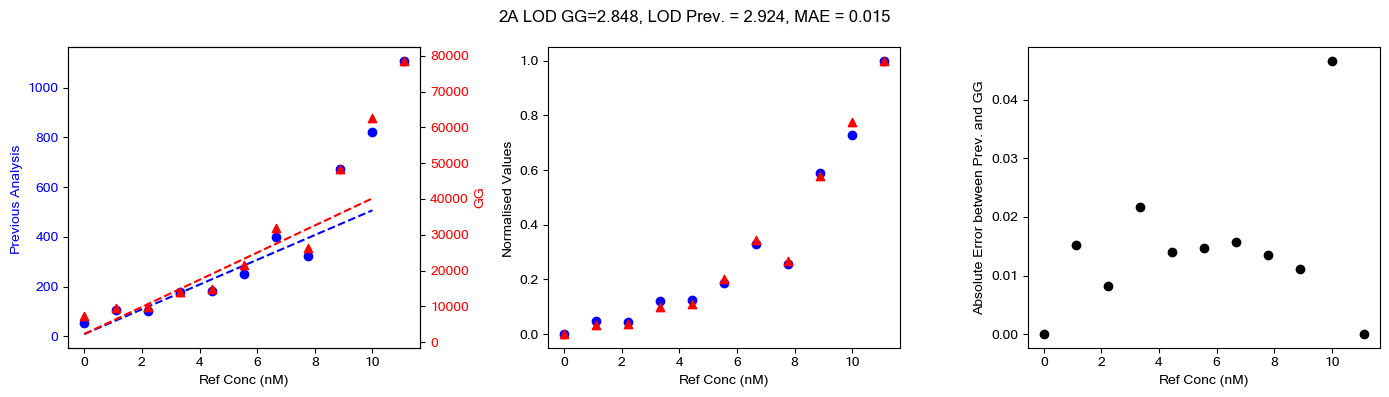

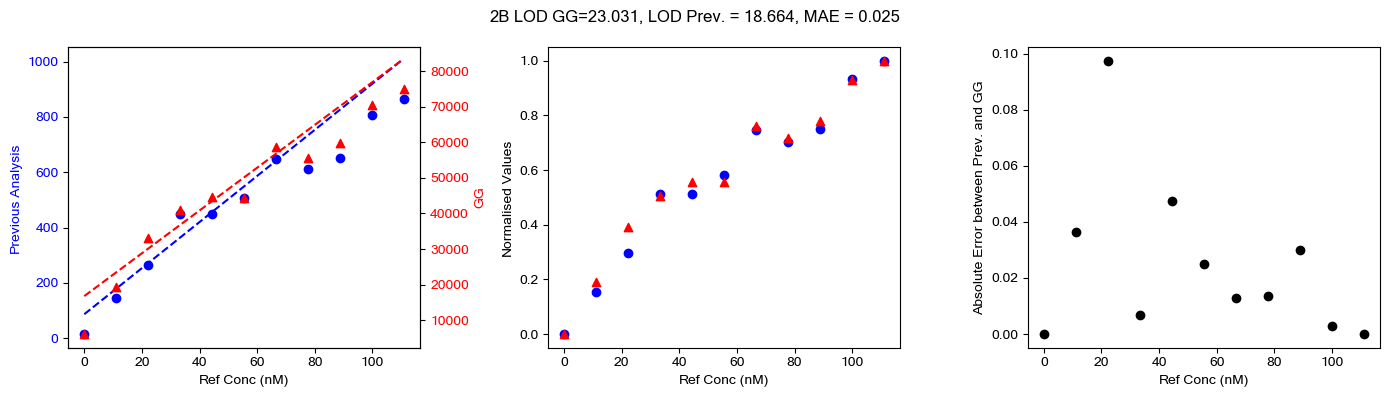

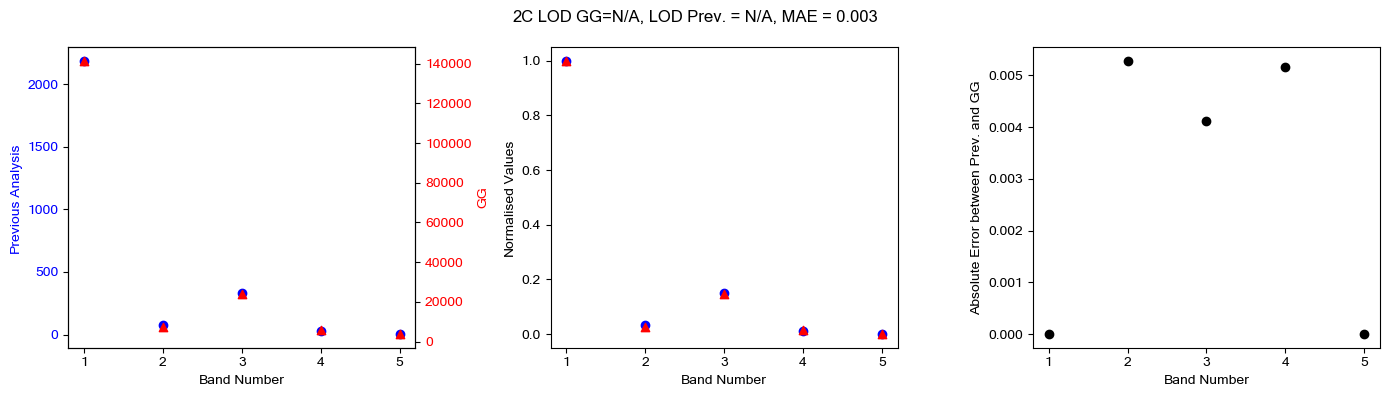

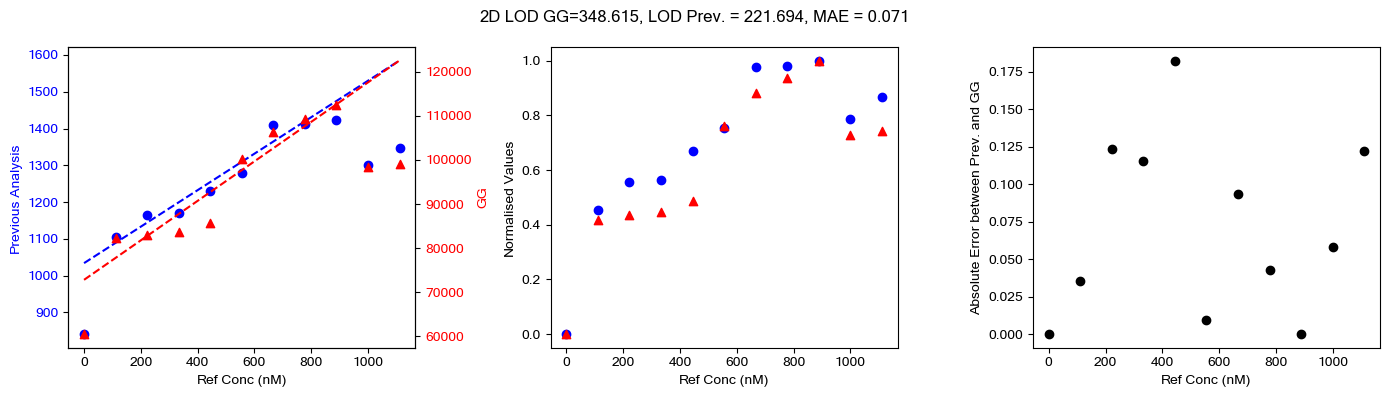

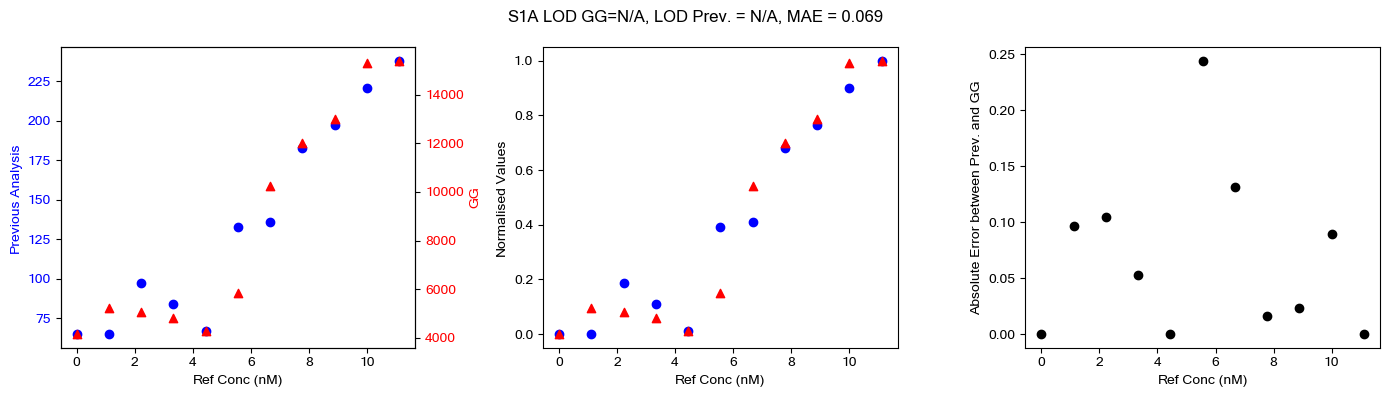

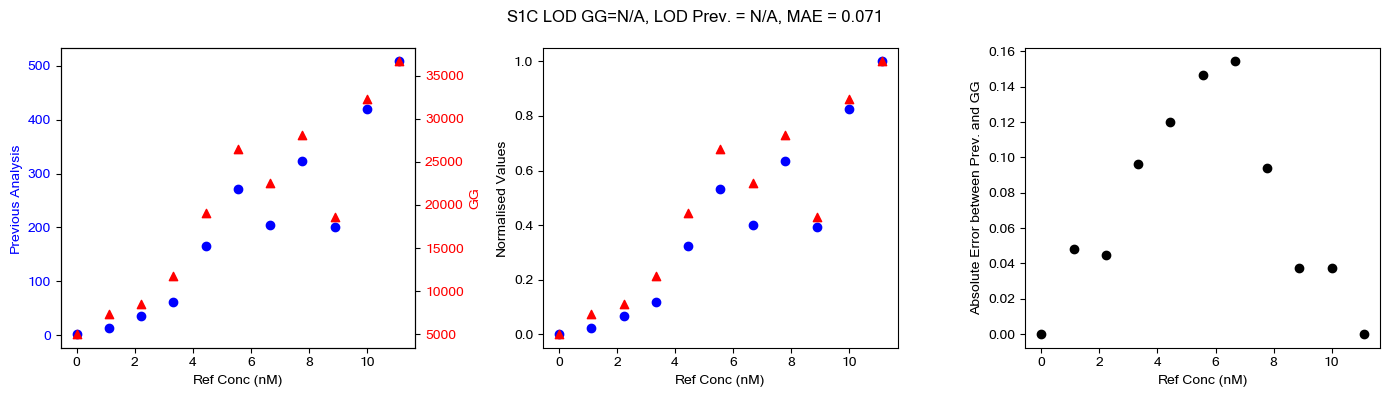

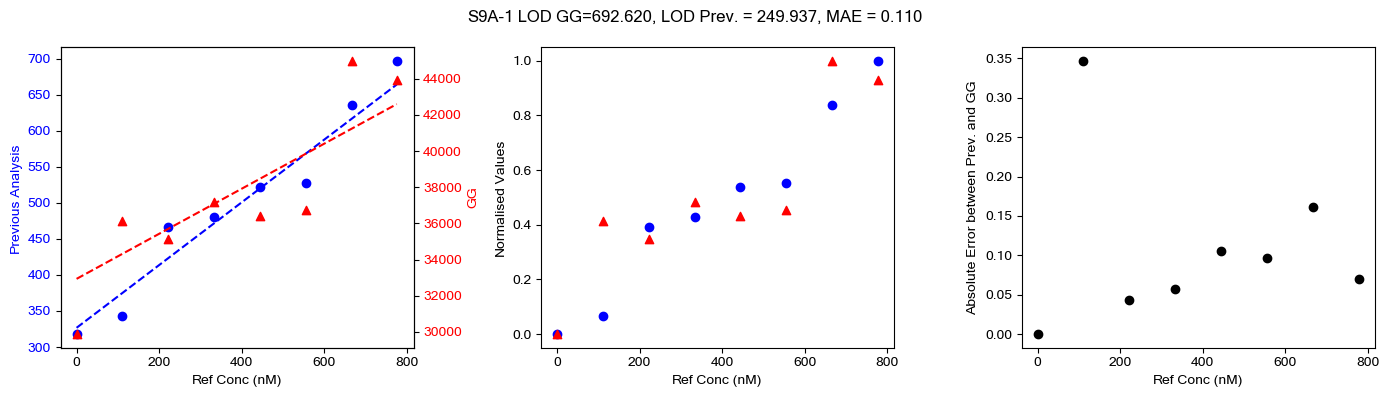

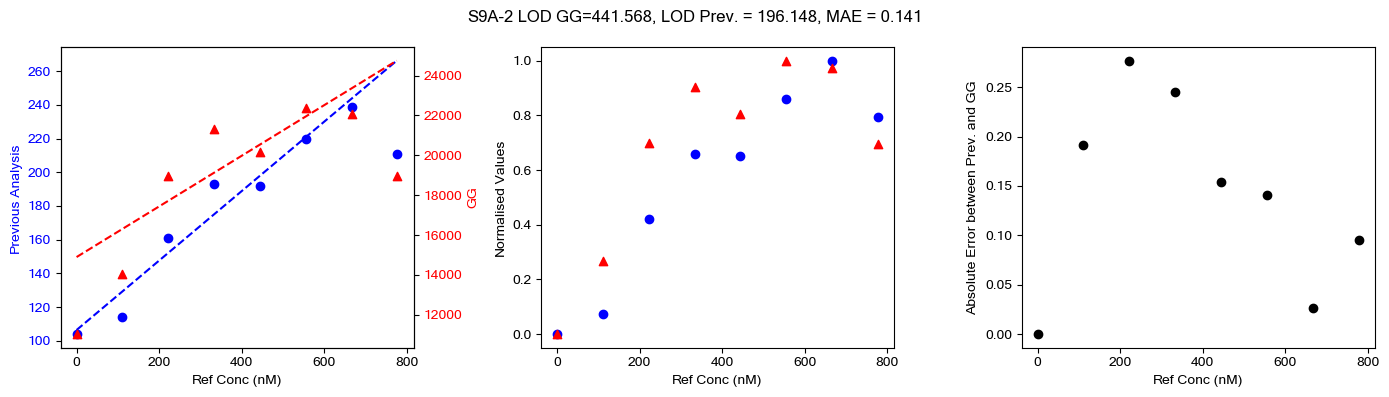

In [7]:
gg_color = 'r'
prev_color = 'blue'
error_color = 'black'

for gel in gel_names:
    df_filt = ma_multi_df[ma_multi_df['Gel Name'] == gel]
    ngg_data = df_filt['Norm. GelGenie']
    np_data = df_filt['Norm. Prev. Analysis']
    gg_data = df_filt['Rolling Ball Corrected Volume']
    p_data = df_filt['Previous Analysis']
    ref_data = df_filt['Reference']

    AE = abs(ngg_data - np_data)
    MAE = np.mean(AE)
    
    if sum(df_filt['LOD Values']) > 0:
        lod_filt = df_filt[df_filt['LOD Values']]
        fit_result_p = linregress(lod_filt['Reference'], lod_filt['Previous Analysis'])
        fit_result_gg = linregress(lod_filt['Reference'], lod_filt['Rolling Ball Corrected Volume'])

        lod_p = 3.3*(fit_result_p.intercept_stderr/fit_result_p.slope)
        lod_gg = 3.3*(fit_result_gg.intercept_stderr/fit_result_gg.slope)
    else:
        lod_p = 'N/A'
        lod_gg = 'N/A'
        
    fig, axs = plt.subplots(1,3, figsize=(14,4))
    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.scatter(ref_data, p_data, c=prev_color)
    ax1.tick_params(axis='y', labelcolor=prev_color)
    ax1.set_xlabel('Ref Conc (nM)')
    ax1.set_ylabel('Previous Analysis', color=prev_color)
    ax1_1 = ax1.twinx() 
    ax1_1.set_ylabel('GG', color=gg_color)  
    ax1_1.scatter(ref_data, gg_data, c=gg_color, marker='^')
    ax1_1.tick_params(axis='y', labelcolor=gg_color)

    if sum(df_filt['LOD Values']) > 0:
        x_vals = range(0, int(max(ref_data)))
        ax1.plot(x_vals, fit_result_p.slope*x_vals + fit_result_p.intercept, c=prev_color, linestyle='dashed')
        ax1_1.plot(x_vals, fit_result_gg.slope*x_vals + fit_result_gg.intercept, c=gg_color, linestyle='dashed')

    ax2.scatter(ref_data, np_data, c=prev_color)
    ax2.scatter(ref_data, ngg_data, c=gg_color, marker='^')
    ax2.set_xlabel('Ref Conc (nM)')
    ax2.set_ylabel('Normalised Values')
    
    ax3.scatter(ref_data, AE, c=error_color)
    ax3.set_xlabel('Ref Conc (nM)')
    ax3.set_ylabel('Absolute Error between Prev. and GG')

    if gel == '2C':
        ax1.set_xlabel('Band Number')
        ax2.set_xlabel('Band Number')
        ax3.set_xlabel('Band Number')
    else:
        ax1.set_xlabel('Ref Conc (nM)')
        ax2.set_xlabel('Ref Conc (nM)')
        ax3.set_xlabel('Ref Conc (nM)')

    if isinstance(lod_gg, str):
        plt.suptitle(gel + ' LOD GG=%s, LOD Prev. = %s, MAE = %.3f' % (lod_gg, lod_p, MAE))
    else:
        plt.suptitle(gel + ' LOD GG=%.3f, LOD Prev. = %.3f, MAE = %.3f' % (lod_gg, lod_p, MAE))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    # when exporting figures, use the following command:
    # plt.savefig('NAME.pdf' % gel, dpi=300)


C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Gel Name', ylabel='ABS Error'>

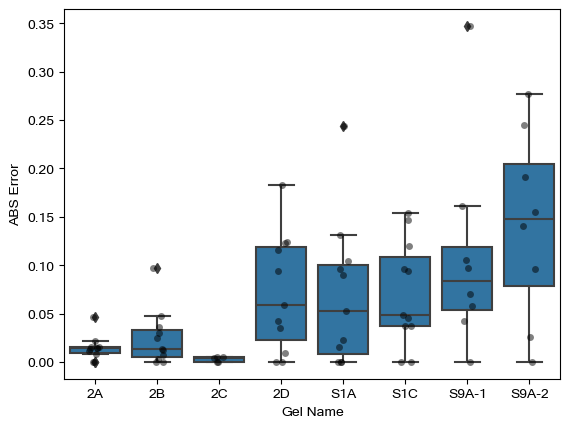

In [12]:
# quick barcharts for each gel

# my interpretation:
# gels 1-3 were clean, clear gels with very distinct bands
# gels 4-6 were so-so - a clear trend was visible in the gel but bands were more diffuse and certain bands in the middle of the distribution introduce more uncertainty
# gels 7-8 are the worst of the dataset - the bands are very similar in intensity and large errors in certain bands skewed the error significantly

sns.boxplot(data=ma_multi_df, x='Gel Name', y='ABS Error', color='tab:blue')
sns.stripplot(data=ma_multi_df, x='Gel Name', y='ABS Error', color='black', alpha=0.5)